# Code for developing model

In [6]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
from keras import Sequential
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [10]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [11]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [13]:
x_train[1]

array([[[ 74, 143, 201],
        [ 71, 140, 200],
        [ 69, 139, 198],
        ...,
        [192, 218, 234],
        [193, 208, 229],
        [184, 200, 219]],

       [[ 78, 140, 194],
        [ 77, 140, 194],
        [ 76, 140, 193],
        ...,
        [226, 240, 233],
        [214, 224, 238],
        [189, 208, 227]],

       [[ 91, 149, 198],
        [ 95, 153, 203],
        [ 98, 156, 206],
        ...,
        [207, 231, 236],
        [181, 216, 231],
        [149, 188, 211]],

       ...,

       [[ 88, 131, 167],
        [ 83, 128, 165],
        [ 75, 122, 161],
        ...,
        [ 86, 129, 175],
        [ 81, 124, 173],
        [ 81, 121, 170]],

       [[ 74, 116, 155],
        [ 69, 113, 154],
        [ 62, 108, 151],
        ...,
        [ 76, 120, 166],
        [ 67, 112, 161],
        [ 66, 108, 157]],

       [[ 63, 105, 147],
        [ 62, 106, 150],
        [ 56, 102, 148],
        ...,
        [ 62, 104, 151],
        [ 54, 100, 149],
        [ 56,  99, 147]]

In [135]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [136]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [137]:
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [138]:
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [139]:
lrr= ReduceLROnPlateau(
                       monitor='val_acc', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [140]:
'The first base model used is VGG19. The pretrained weights from the imagenet challenge are used'
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

'For the 2nd base model we will use Resnet 50 and compare the performance against the previous one.The hypothesis is that Resnet 50 should perform better because of its deeper architecture'
base_model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

C:\Users\이석현\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
model_1= Sequential()
model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten())

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax')))

In [21]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

C:\Python\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [22]:
batch_size= 100
epochs=50

learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [23]:
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model_1.fit_generator(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),validation_steps=250,
                      callbacks=[lrr],verbose=1)

Epoch 1/50
350/350 [==============================] - 2046s 6s/step - loss: 1.7186 - accuracy: 0.3545 - val_loss: 1.2192 - val_accuracy: 0.5733
Epoch 2/50


C:\Python\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


350/350 [==============================] - 2065s 6s/step - loss: 0.9338 - accuracy: 0.6791 - val_loss: 0.8216 - val_accuracy: 0.7285
Epoch 3/50
350/350 [==============================] - 2053s 6s/step - loss: 0.7221 - accuracy: 0.7540 - val_loss: 0.8813 - val_accuracy: 0.7663
Epoch 4/50
350/350 [==============================] - 2037s 6s/step - loss: 0.6059 - accuracy: 0.7946 - val_loss: 0.6699 - val_accuracy: 0.7863
Epoch 5/50
350/350 [==============================] - 2004s 6s/step - loss: 0.5278 - accuracy: 0.8183 - val_loss: 0.5166 - val_accuracy: 0.7950
Epoch 6/50
350/350 [==============================] - 5482s 16s/step - loss: 0.4728 - accuracy: 0.8376 - val_loss: 0.6859 - val_accuracy: 0.8066
Epoch 7/50
350/350 [==============================] - 1978s 6s/step - loss: 0.4171 - accuracy: 0.8553 - val_loss: 0.4792 - val_accuracy: 0.8196
Epoch 8/50
350/350 [==============================] - 1981s 6s/step - loss: 0.3774 - accuracy: 0.8697 - val_loss: 0.5425 - val_accuracy: 0.8274
Ep

KeyboardInterrupt: 

Save Model

In [28]:
model_1.save('cifar10_model.h5')

In [31]:
model_json = model_1.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [33]:
model_1.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Load Model

In [39]:
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [40]:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [41]:
loaded_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [42]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [52]:
score = loaded_model.evaluate(x_train, y_train, verbose=0)

print("%s : %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

NameError: name 'x_train' is not defined

Upload Image

In [65]:
import urllib.request
import os

In [84]:
url = "https://static.addtoany.com/images/dracaena-cinnabari.jpg"
print(os.system("curl"))
os.system("curl " + url + " > test.jpg")

2


0

In [123]:
import cv2
im = cv2.imread('test2.jpg') #사진 읽어들이기

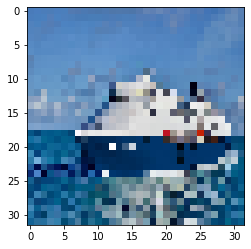

In [124]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #색공간 변환
im = cv2.resize(im, (32,32)) #사이즈 조정

#이미지 출력
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [125]:
in_size = 32*32*3

import numpy as np
im = im.reshape(-1,32,32,3)/ 255
print(im)
im.shape

[[[[0.28627451 0.48235294 0.72941176]
   [0.29019608 0.49019608 0.74509804]
   [0.29411765 0.49019608 0.72941176]
   ...
   [0.34509804 0.50196078 0.70196078]
   [0.4        0.52941176 0.70588235]
   [0.34509804 0.50196078 0.70196078]]

  [[0.29019608 0.49019608 0.7372549 ]
   [0.28627451 0.49803922 0.74117647]
   [0.29019608 0.50196078 0.74509804]
   ...
   [0.39215686 0.5372549  0.71372549]
   [0.4        0.54509804 0.72156863]
   [0.3372549  0.49803922 0.70196078]]

  [[0.31764706 0.50980392 0.74117647]
   [0.29803922 0.50980392 0.74509804]
   [0.32156863 0.49803922 0.72156863]
   ...
   [0.36470588 0.52156863 0.72156863]
   [0.37254902 0.52941176 0.72156863]
   [0.33333333 0.50196078 0.70980392]]

  ...

  [[0.27058824 0.54117647 0.7254902 ]
   [0.03529412 0.36078431 0.54509804]
   [0.19607843 0.44313725 0.62352941]
   ...
   [0.00784314 0.34117647 0.53333333]
   [0.00392157 0.2627451  0.44705882]
   [0.00784314 0.32156863 0.49803922]]

  [[0.14117647 0.45882353 0.64705882]
   [0.0

(1, 32, 32, 3)

In [126]:
r = loaded_model.predict(im)
r

array([[0.00688881, 0.00395561, 0.2065649 , 0.06371722, 0.6116261 ,
        0.019401  , 0.05895606, 0.014032  , 0.00556926, 0.00928908]],
      dtype=float32)

In [127]:
res = r[0]

In [128]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [129]:
for i, acc in enumerate(res) :
    print(labels[i], "=", int(acc*100))
print(labels[res.argmax()])

Airplane = 0
Automobile = 0
Bird = 20
Cat = 6
Deer = 61
Dog = 1
Frog = 5
Horse = 1
Ship = 0
Truck = 0
Deer


# code for image classification

In [11]:
from tkinter import *
import urllib.request
import os
  
# loading Python Imaging Library 
from PIL import ImageTk, Image 
  
# To get the dialog box to open when required  
#from tkinter import filedialog 

def img_processing():
    from keras.models import model_from_json
    json_file = open("model.json", "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("model.h5")
    loaded_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
    
    import cv2
    im = cv2.imread('test.jpg') #사진 읽어들이기
    
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #색공간 변환
    im = cv2.resize(im, (32,32)) #사이즈 
    
    in_size = 32*32*3

    import numpy as np
    im = im.reshape(-1,32,32,3)/ 255
    
    r = loaded_model.predict(im)
    
    res = r[0]
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    for i, acc in enumerate(res) :
        print(labels[i], "=", int(acc*100))
    return labels[res.argmax()]

def download_img():
    url = txt.get()
    #print(url)
    os.system("curl " + url + " > test.jpg")
    open_img()

def open_img(): 
    # Select the Imagename  from a folder  
    x = 'C:/Users/이석현/딥러닝/test.jpg' 
  
    # opens the image 
    img = Image.open(x) 
      
    # resize the image and apply a high-quality down sampling filter 
    img = img.resize((250, 250), Image.ANTIALIAS) 
  
    # PhotoImage class is used to add image to widgets, icons etc 
    img = ImageTk.PhotoImage(img) 
   
    # create a label 
    panel = Label(root, image = img) 
      
    # set the image as img  
    panel.image = img 
    panel.grid(row = 2)
    
    result = img_processing()
    lbl3 = Label(root, text=result)
    lbl3.grid(row=2,column=2)
    
# Create a windoe 
root = Tk() 
  
# Set Title as Image Loader 
root.title("Image Classification") 
  
# Set the resolution of window 
root.geometry("550x300+300+150") 
  
# Allow Window to be resizable 
root.resizable(width = True, height = True) 
  
# Create a button and place it into the window using grid layout 
txt = Entry(root, width=30)
txt.grid(row=1)

btn = Button(root, text ='Upload image', command = download_img).grid(row = 1, column=1, columnspan = 4) 
#print(txt.get())
#open_img()
#download_img(Entry.get(txt))
lbl2 = Label(root, text="This image is: ")
lbl2.grid(row=2,column=1)

root.mainloop() 

Airplane = 0
Automobile = 0
Bird = 24
Cat = 6
Deer = 57
Dog = 2
Frog = 6
Horse = 1
Ship = 0
Truck = 0


Loading Images in Tkinter Using PIL

In [71]:

from tkinter import *
  
# loading Python Imaging Library 
from PIL import ImageTk, Image 
  
# To get the dialog box to open when required  
from tkinter import filedialog 

def open_img(): 
    # Select the Imagename  from a folder  
    x = openfilename() #C:/Users/이석현/딥러닝/test.jpg
  
    # opens the image 
    img = Image.open(x) 
      
    # resize the image and apply a high-quality down sampling filter 
    img = img.resize((250, 250), Image.ANTIALIAS) 
  
    # PhotoImage class is used to add image to widgets, icons etc 
    img = ImageTk.PhotoImage(img) 
   
    # create a label 
    panel = Label(root, image = img) 
      
    # set the image as img  
    panel.image = img 
    panel.grid(row = 2) 
    
def openfilename(): 
  
    # open file dialog box to select image 
    # The dialogue box has a title "Open" 
    filename = filedialog.askopenfilename(title ='"pen') 
    print(filename)
    return filename 

# Create a windoe 
root = Tk() 
  
# Set Title as Image Loader 
root.title("Image Loader") 
  
# Set the resolution of window 
root.geometry("550x300+300+150") 
  
# Allow Window to be resizable 
root.resizable(width = True, height = True) 
  
# Create a button and place it into the window using grid layout 
btn = Button(root, text ='open image', command = open_img).grid( 
                                        row = 1, columnspan = 4) 
root.mainloop() 

C:/Users/이석현/딥러닝/test.jpg


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-71-036616a7400c>", line 15, in open_img
    img = Image.open(x)
  File "C:\Python\Anaconda3\lib\site-packages\PIL\Image.py", line 2818, in open
    raise IOError("cannot identify image file %r" % (filename if filename else fp))
OSError: cannot identify image file 'C:/Users/이석현/딥러닝/test.jpg'


C:/Users/이석현/딥러닝/test1.jpg


In [43]:
from tkinter import *
import urllib.request
import os
  
from PIL import ImageTk, Image 

#from tkinter import filedialog 

def img_processing():
    from keras.models import model_from_json
    json_file = open("model.json", "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("model.h5")
    loaded_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
    
    import cv2
    im = cv2.imread('test.jpg')
    
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (32,32)) 
    
    in_size = 32*32*3

    import numpy as np
    im = im.reshape(-1,32,32,3)/ 255
    
    r = loaded_model.predict(im)
    
    res = r[0]
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    for i, acc in enumerate(res) :
        print(labels[i], "=", int(acc*100))
    return labels[res.argmax()]

def download_img():
    url = txt.get()
    #print(url)
    os.system("curl " + url + " > test.jpg")
    open_img()

def open_img(): 
    x = 'C:/Users/이석현/딥러닝/test.jpg' 
    img = Image.open(x) 
    img = img.resize((250, 250), Image.ANTIALIAS) 
    img = ImageTk.PhotoImage(img) 
    panel = Label(root, image = img) 
    panel.image = img 
    panel.grid(row = 2)
    
    result = img_processing()
    lbl3 = Label(root, text=result)
    lbl3.grid(row=2,column=2)
    
root = Tk()  
root.title("Image Classification") 
root.geometry("550x300+300+150") 
root.resizable(width = True, height = True) 
txt = Entry(root, width=30)
txt.grid(row=1)

btn = Button(root, text ='Upload image', command = download_img).grid(row = 1, column=1, columnspan = 4) 
lbl2 = Label(root, text="This image is: ")
lbl2.grid(row=2,column=1)

root.mainloop() 

Airplane = 0
Automobile = 0
Bird = 16
Cat = 4
Deer = 69
Dog = 1
Frog = 4
Horse = 1
Ship = 0
Truck = 0
